In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Load the data
data = pd.read_csv('Resources/clean_property_data.csv')

# Print the columns to check for the correct column name
print(data.columns)

Index(['district', 'nbhd', 'style', 'extwall', 'stories', 'year_built',
       'rooms', 'finishedsqft', 'units', 'bdrms', 'fbath', 'hbath', 'lotsize',
       'sale_date', 'sale_price', 'sale_year', 'sale_month'],
      dtype='object')


In [4]:

# Clean column names by stripping any extra spaces
data.columns = data.columns.str.strip()

In [5]:

# Check the cleaned column names
print(data.columns)

Index(['district', 'nbhd', 'style', 'extwall', 'stories', 'year_built',
       'rooms', 'finishedsqft', 'units', 'bdrms', 'fbath', 'hbath', 'lotsize',
       'sale_date', 'sale_price', 'sale_year', 'sale_month'],
      dtype='object')


In [6]:
data.info(type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37910 entries, 0 to 37909
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   district      37910 non-null  float64
 1   nbhd          37910 non-null  float64
 2   style         37910 non-null  object 
 3   extwall       37910 non-null  object 
 4   stories       37910 non-null  float64
 5   year_built    37910 non-null  float64
 6   rooms         37910 non-null  float64
 7   finishedsqft  37910 non-null  float64
 8   units         37910 non-null  int64  
 9   bdrms         37910 non-null  float64
 10  fbath         37910 non-null  float64
 11  hbath         37910 non-null  float64
 12  lotsize       37910 non-null  float64
 13  sale_date     37910 non-null  object 
 14  sale_price    37910 non-null  float64
 15  sale_year     37910 non-null  int64  
 16  sale_month    37910 non-null  int64  
dtypes: float64(11), int64(3), object(3)
memory usage: 4.9+ MB


In [7]:
#Checking to make sure there are no nulls 
data.isnull().sum()

district        0
nbhd            0
style           0
extwall         0
stories         0
year_built      0
rooms           0
finishedsqft    0
units           0
bdrms           0
fbath           0
hbath           0
lotsize         0
sale_date       0
sale_price      0
sale_year       0
sale_month      0
dtype: int64

In [8]:
#converting the sale date to datetime , becasue when imported here it couldnt read it as datetime
data['sale_date'] = pd.to_datetime(data['sale_date'], errors='coerce')
data.info(type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37910 entries, 0 to 37909
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   district      37910 non-null  float64       
 1   nbhd          37910 non-null  float64       
 2   style         37910 non-null  object        
 3   extwall       37910 non-null  object        
 4   stories       37910 non-null  float64       
 5   year_built    37910 non-null  float64       
 6   rooms         37910 non-null  float64       
 7   finishedsqft  37910 non-null  float64       
 8   units         37910 non-null  int64         
 9   bdrms         37910 non-null  float64       
 10  fbath         37910 non-null  float64       
 11  hbath         37910 non-null  float64       
 12  lotsize       37910 non-null  float64       
 13  sale_date     37910 non-null  datetime64[ns]
 14  sale_price    37910 non-null  float64       
 15  sale_year     37910 non-null  int64 

In [9]:
#dropping saledate b/c it's not needed for the model. We're going to use sale-year and sale-month
data = data.drop(columns=['sale_date'])
data

,district,nbhd,style,extwall,stories,year_built,rooms,finishedsqft,units,bdrms,fbath,hbath,lotsize,sale_price,sale_year,sale_month
0,9.0,40.0,cape cod,aluminum/vinyl,1.0,1942.0,7.0,1182.0,1,4.0,1.0,1.0,33541.0,160000.0,2023,12
1,9.0,40.0,ranch,fiber cement/hardiplank,1.0,2006.0,9.0,1880.0,1,3.0,2.0,0.0,10607.0,387500.0,2023,8
2,9.0,40.0,ranch,aluminum/vinyl,1.0,1980.0,6.0,1489.0,1,3.0,3.0,0.0,8640.0,335000.0,2023,8
3,9.0,40.0,ranch,aluminum/vinyl,1.0,1986.0,5.0,1209.0,1,3.0,1.0,1.0,7200.0,250000.0,2023,6
4,9.0,40.0,colonial,aluminum/vinyl,2.0,1989.0,6.0,1663.0,1,3.0,2.0,1.0,7200.0,270000.0,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37905,14.0,4180.0,milwaukee bungalow,aluminum / vinyl,1.0,1922.0,0.0,988.0,1,3.0,1.0,0.0,3660.0,61500.0,2013,12
37906,14.0,4620.0,ranch,aluminum / vinyl,1.0,1950.0,0.0,1119.0,1,3.0,1.0,0.0,5120.0,65000.0,2013,12
37907,14.0,4700.0,ranch,aluminum / vinyl,1.0,1951.0,0.0,725.0,1,2.0,1.0,0.0,5546.0,97500.0,2013,12
37908,14.0,4600.0,residence o/s,aluminum / vinyl,1.0,1926.0,0.0,937.0,1,2.0,1.0,0.0,4560.0,149000.0,2013,12


In [10]:
# Converting all non-numerical vvalues to numerical category 
data_dummies = pd.get_dummies(data)
data_dummies

,district,nbhd,stories,year_built,rooms,finishedsqft,units,bdrms,fbath,hbath,...,extwall_frame,extwall_masonary frame,extwall_masonry / frame,extwall_masonry/frame,extwall_metal siding,extwall_precast masonary,extwall_prem wood,extwall_stone,extwall_stucco,extwall_wood
0,9.0,40.0,1.0,1942.0,7.0,1182.0,1,4.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,9.0,40.0,1.0,2006.0,9.0,1880.0,1,3.0,2.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,9.0,40.0,1.0,1980.0,6.0,1489.0,1,3.0,3.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,9.0,40.0,1.0,1986.0,5.0,1209.0,1,3.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,9.0,40.0,2.0,1989.0,6.0,1663.0,1,3.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37905,14.0,4180.0,1.0,1922.0,0.0,988.0,1,3.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
37906,14.0,4620.0,1.0,1950.0,0.0,1119.0,1,3.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
37907,14.0,4700.0,1.0,1951.0,0.0,725.0,1,2.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
37908,14.0,4600.0,1.0,1926.0,0.0,937.0,1,2.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [11]:
#creating the independent variables set 
X = data_dummies.drop(columns=['sale_price'])
X

,district,nbhd,stories,year_built,rooms,finishedsqft,units,bdrms,fbath,hbath,...,extwall_frame,extwall_masonary frame,extwall_masonry / frame,extwall_masonry/frame,extwall_metal siding,extwall_precast masonary,extwall_prem wood,extwall_stone,extwall_stucco,extwall_wood
0,9.0,40.0,1.0,1942.0,7.0,1182.0,1,4.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,9.0,40.0,1.0,2006.0,9.0,1880.0,1,3.0,2.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,9.0,40.0,1.0,1980.0,6.0,1489.0,1,3.0,3.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,9.0,40.0,1.0,1986.0,5.0,1209.0,1,3.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,9.0,40.0,2.0,1989.0,6.0,1663.0,1,3.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37905,14.0,4180.0,1.0,1922.0,0.0,988.0,1,3.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
37906,14.0,4620.0,1.0,1950.0,0.0,1119.0,1,3.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
37907,14.0,4700.0,1.0,1951.0,0.0,725.0,1,2.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
37908,14.0,4600.0,1.0,1926.0,0.0,937.0,1,2.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# creating the dependent variable set 
y = data_dummies['sale_price']
y

0        160000.0
1        387500.0
2        335000.0
3        250000.0
4        270000.0
           ...   
37905     61500.0
37906     65000.0
37907     97500.0
37908    149000.0
37909    102900.0
Name: sale_price, Length: 37910, dtype: float64

In [13]:
# spliting data into training and testing 80/20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Linear Regression


In [14]:
# setting the model to linear regression 
model = LinearRegression()
# fitting the model 
model.fit(X_train, y_train)

LinearRegression()

In [15]:
coef = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coef

,Coefficient
district,-2249.097556
nbhd,22.926627
stories,13226.534195
year_built,211.187994
rooms,147.671999
finishedsqft,72.780398
units,-49331.330327
bdrms,-84.922390
fbath,33379.013895
hbath,17621.842349


In [16]:
# Prediction with test data 
y_pred = model.predict(X_test)
# getting mean square 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4645271115.91568


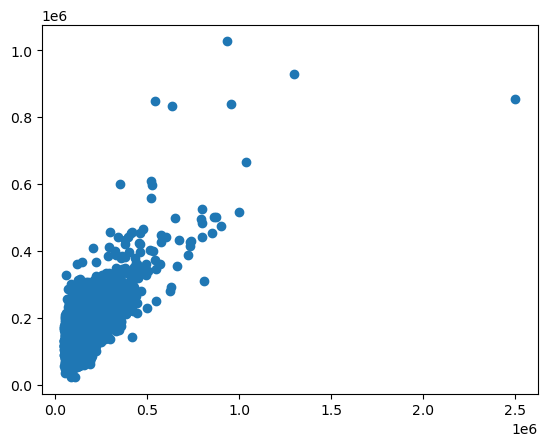

In [17]:
plt.scatter(y_test, y_pred)

In [18]:
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,182346.271507
1,127503.527902
2,170725.039737
3,147001.301639
4,126577.987619
...,...
3786,175238.419736
3787,172860.668896
3788,233198.916518
3789,152914.023437


In [19]:
y_test

7901     330000.0
198      124000.0
13573    232500.0
34758    111250.0
22900    146500.0
           ...   
22162    188400.0
19191    125000.0
9771     252000.0
32525     55000.0
10709     98900.0
Name: sale_price, Length: 3791, dtype: float64

In [20]:
# determining accuracy score 
model.score(X_test, y_test)

0.5556277725603478

## Random Forest Regressor

In [21]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
y_pred = model.predict(X_test)
# getting mean square 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2189326558.914987


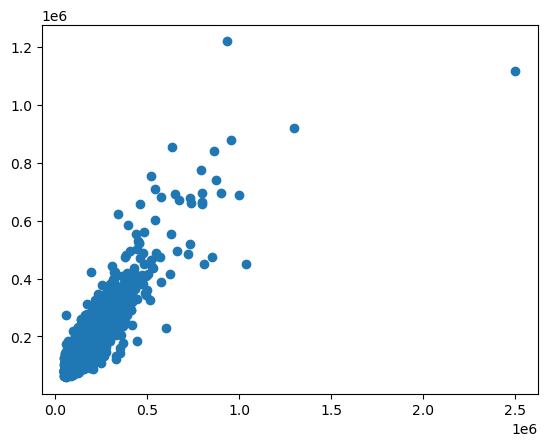

In [23]:
plt.scatter(y_test, y_pred)

In [32]:
X_test.head()

,district,nbhd,stories,year_built,rooms,finishedsqft,units,bdrms,fbath,hbath,...,extwall_frame,extwall_masonary frame,extwall_masonry / frame,extwall_masonry/frame,extwall_metal siding,extwall_precast masonary,extwall_prem wood,extwall_stone,extwall_stucco,extwall_wood
7901,4.0,3040.0,2.0,1890.0,12.0,2059.0,2,7.0,2.0,0.0,...,False,False,False,False,False,False,False,False,False,False
198,9.0,560.0,1.0,1963.0,5.0,1033.0,1,3.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
13573,14.0,4510.0,1.0,1925.0,6.0,1160.0,1,2.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
34758,5.0,2100.0,1.0,1951.0,0.0,1529.0,1,3.0,2.0,0.0,...,False,False,False,False,False,False,False,False,True,False
22900,9.0,480.0,1.0,1959.0,0.0,1126.0,1,3.0,2.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [34]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3791 entries, 7901 to 10709
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   district                          3791 non-null   float64
 1   nbhd                              3791 non-null   float64
 2   stories                           3791 non-null   float64
 3   year_built                        3791 non-null   float64
 4   rooms                             3791 non-null   float64
 5   finishedsqft                      3791 non-null   float64
 6   units                             3791 non-null   int64  
 7   bdrms                             3791 non-null   float64
 8   fbath                             3791 non-null   float64
 9   hbath                             3791 non-null   float64
 10  lotsize                           3791 non-null   float64
 11  sale_year                         3791 non-null   int64  
 12  sale_mo

In [24]:
model.score(X_test, y_test)

0.7905663856207308

House Price Prediction Using Elle's Model and the Previous (Unfiltered) Dataset

In [26]:
listings_data_df = pd.read_csv("Resources/original_extracted_df_MilwaukeeOnly.csv")
listings_data_df.head()

,State,City,Street,Zipcode,Latitude,Longitude,Bedroom,Bathroom,Area,PPSq,LotArea,ConvertedLot,LotUnit,MarketEstimate,RentEstimate,Price
0,WI,Milwaukee,North 26th STREET,53206,43.076214,-87.946370,4,2,NaN,NaN,3920.40,0.09,sqft,NaN,1425.0,7000
1,WI,Milwaukee,North 37th STREET,53210,43.066345,-87.959490,4,2,1714.0,20.361727,3484.80,0.08,sqft,NaN,1345.0,34900
2,WI,Milwaukee,North Sherman BOULEVARD UNIT 4326,53216,43.095818,-87.966620,4,2,1500.0,83.266667,0.62,0.62,acres,NaN,NaN,124900
3,WI,Milwaukee,North 25th STREET,53205,43.056957,-87.944756,3,2,1184.0,114.020270,4356.00,0.10,sqft,132800.0,1500.0,135000
4,WI,Milwaukee,North 86th PLACE,53225,43.121850,-88.019295,3,2,1271.0,106.215578,7840.80,0.18,sqft,136300.0,1875.0,135000


In [27]:
listings_data_df = listings_data_df.drop(columns=['PPSq', 'ConvertedLot','LotUnit','RentEstimate'], axis=1)
listings_data_df = listings_data_df[['Street', 'City', 'State', 'Zipcode', 'Latitude', 'Longitude', 'Bedroom', 'Bathroom', 'Area','LotArea', 'Price','MarketEstimate']]
listings_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Street          33 non-null     object 
 1   City            33 non-null     object 
 2   State           33 non-null     object 
 3   Zipcode         33 non-null     int64  
 4   Latitude        33 non-null     float64
 5   Longitude       33 non-null     float64
 6   Bedroom         33 non-null     int64  
 7   Bathroom        33 non-null     int64  
 8   Area            32 non-null     float64
 9   LotArea         28 non-null     float64
 10  Price           33 non-null     int64  
 11  MarketEstimate  26 non-null     float64
dtypes: float64(5), int64(4), object(3)
memory usage: 3.2+ KB


In [28]:
listings_data_df = listings_data_df.rename(columns={'Bedroom': 'Bedrooms', 'Bathroom':'Bathrooms','Area':'FinishedSqft', 'LotArea': 'Lotsize'})
listings_data_df.head()

,Street,City,State,Zipcode,Latitude,Longitude,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Price,MarketEstimate
0,North 26th STREET,Milwaukee,WI,53206,43.076214,-87.946370,4,2,NaN,3920.40,7000,NaN
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0


In [29]:
listings_data_df.isnull().sum()

Street            0
City              0
State             0
Zipcode           0
Latitude          0
Longitude         0
Bedrooms          0
Bathrooms         0
FinishedSqft      1
Lotsize           5
Price             0
MarketEstimate    7
dtype: int64

In [30]:
listings_data_df=listings_data_df.dropna(subset=['FinishedSqft','Lotsize'])
listings_data_df.isnull().sum()

Street            0
City              0
State             0
Zipcode           0
Latitude          0
Longitude         0
Bedrooms          0
Bathrooms         0
FinishedSqft      0
Lotsize           0
Price             0
MarketEstimate    4
dtype: int64

In [31]:
prediction1_df = listings_data_df.copy()
prediction1_df['Year'] = 2024
prediction1_df.head()

,Street,City,State,Zipcode,Latitude,Longitude,Bedrooms,Bathrooms,FinishedSqft,Lotsize,Price,MarketEstimate,Year
1,North 37th STREET,Milwaukee,WI,53210,43.066345,-87.959490,4,2,1714.0,3484.80,34900,NaN,2024
2,North Sherman BOULEVARD UNIT 4326,Milwaukee,WI,53216,43.095818,-87.966620,4,2,1500.0,0.62,124900,NaN,2024
3,North 25th STREET,Milwaukee,WI,53205,43.056957,-87.944756,3,2,1184.0,4356.00,135000,132800.0,2024
4,North 86th PLACE,Milwaukee,WI,53225,43.121850,-88.019295,3,2,1271.0,7840.80,135000,136300.0,2024
5,North 35th STREET,Milwaukee,WI,53216,43.095448,-87.957344,2,1,667.0,4356.00,137500,139700.0,2024


In [33]:
X_pred1 = prediction1_df[['Bedrooms', 'Bathrooms','FinishedSqft', 'Lotsize','Year']]
y_predicted_sales1 = model.predict(X_pred1)
listings_data_df['2024 Forecasted House Price'] = y_predicted_sales1
listings_data_df['Price Difference'] = listings_data_df['Price'] - listings_data_df['2024 Forecasted House Price']
listings_data_df['Market Estimate Difference'] = listings_data_df['MarketEstimate'] - listings_data_df['2024 Forecasted House Price']
listings_data_df

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Bathrooms
- Bedrooms
- FinishedSqft
- Lotsize
- Year
Feature names seen at fit time, yet now missing:
- bdrms
- district
- extwall_alum/vynyl siding
- extwall_aluminum / vinyl
- extwall_aluminum/vinyl
- ...
